In [78]:
import pandas as pd

file_path = '/Users/vishaldutt/Downloads/fdata.csv'
data = pd.read_csv(file_path)
initial_data_overview = data.head()

missing_values_before = data.isnull().sum()

numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

missing_values_after = data.isnull().sum()


initial_data_overview, missing_values_before, missing_values_after

(      id Gender   1st   2nd   3rd   4th   5th  status
 0  17017      M  6.19  6.21  5.70  5.46  6.93       0
 1  17018      F  6.22  6.28  6.11  6.11  6.54       0
 2  17018      F  8.22  8.76  7.74  8.46  8.38       0
 3  17019      M  5.85  5.66  4.59  5.86  6.00       0
 4  17019      M  7.15  6.79  6.75  6.78  6.62       0,
 id        0
 Gender    0
 1st       2
 2nd       4
 3rd       2
 4th       5
 5th       6
 status    0
 dtype: int64,
 id        0
 Gender    0
 1st       0
 2nd       0
 3rd       0
 4th       0
 5th       0
 status    0
 dtype: int64)

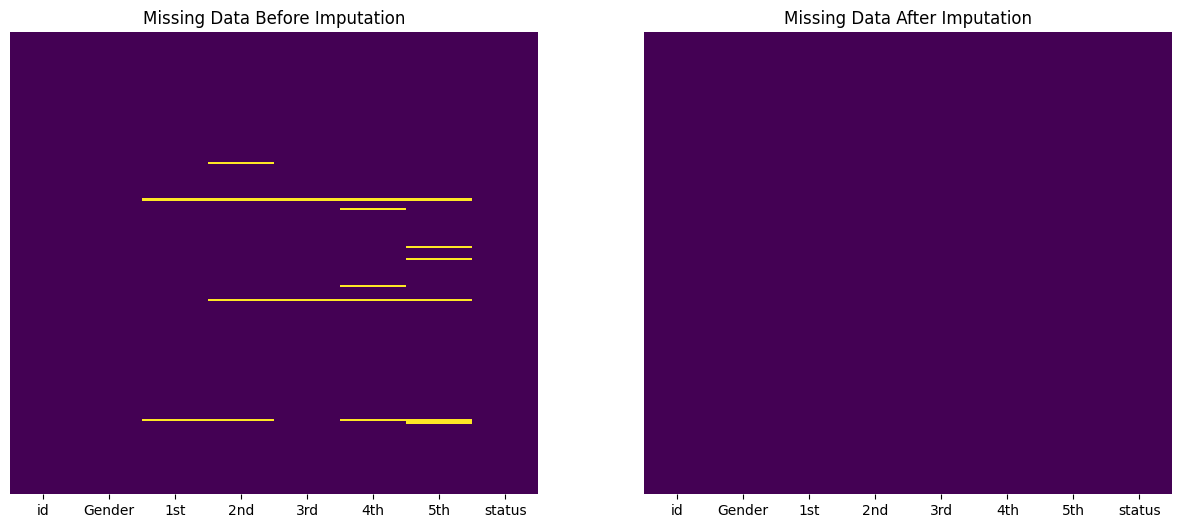

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

original_data = pd.read_csv(file_path)

missing_before = original_data.isnull()
missing_after = data.isnull()
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.heatmap(missing_before, cmap="viridis", yticklabels=False, cbar=False, ax=axes[0])
axes[0].set_title('Missing Data Before Imputation')
sns.heatmap(missing_after, cmap="viridis", yticklabels=False, cbar=False, ax=axes[1])
axes[1].set_title('Missing Data After Imputation')

plt.show()

,Z-Score Outliers,IQR Outliers
id,0,28
1st,0,14
2nd,0,6
3rd,0,3
4th,0,4
5th,2,4
status,0,31


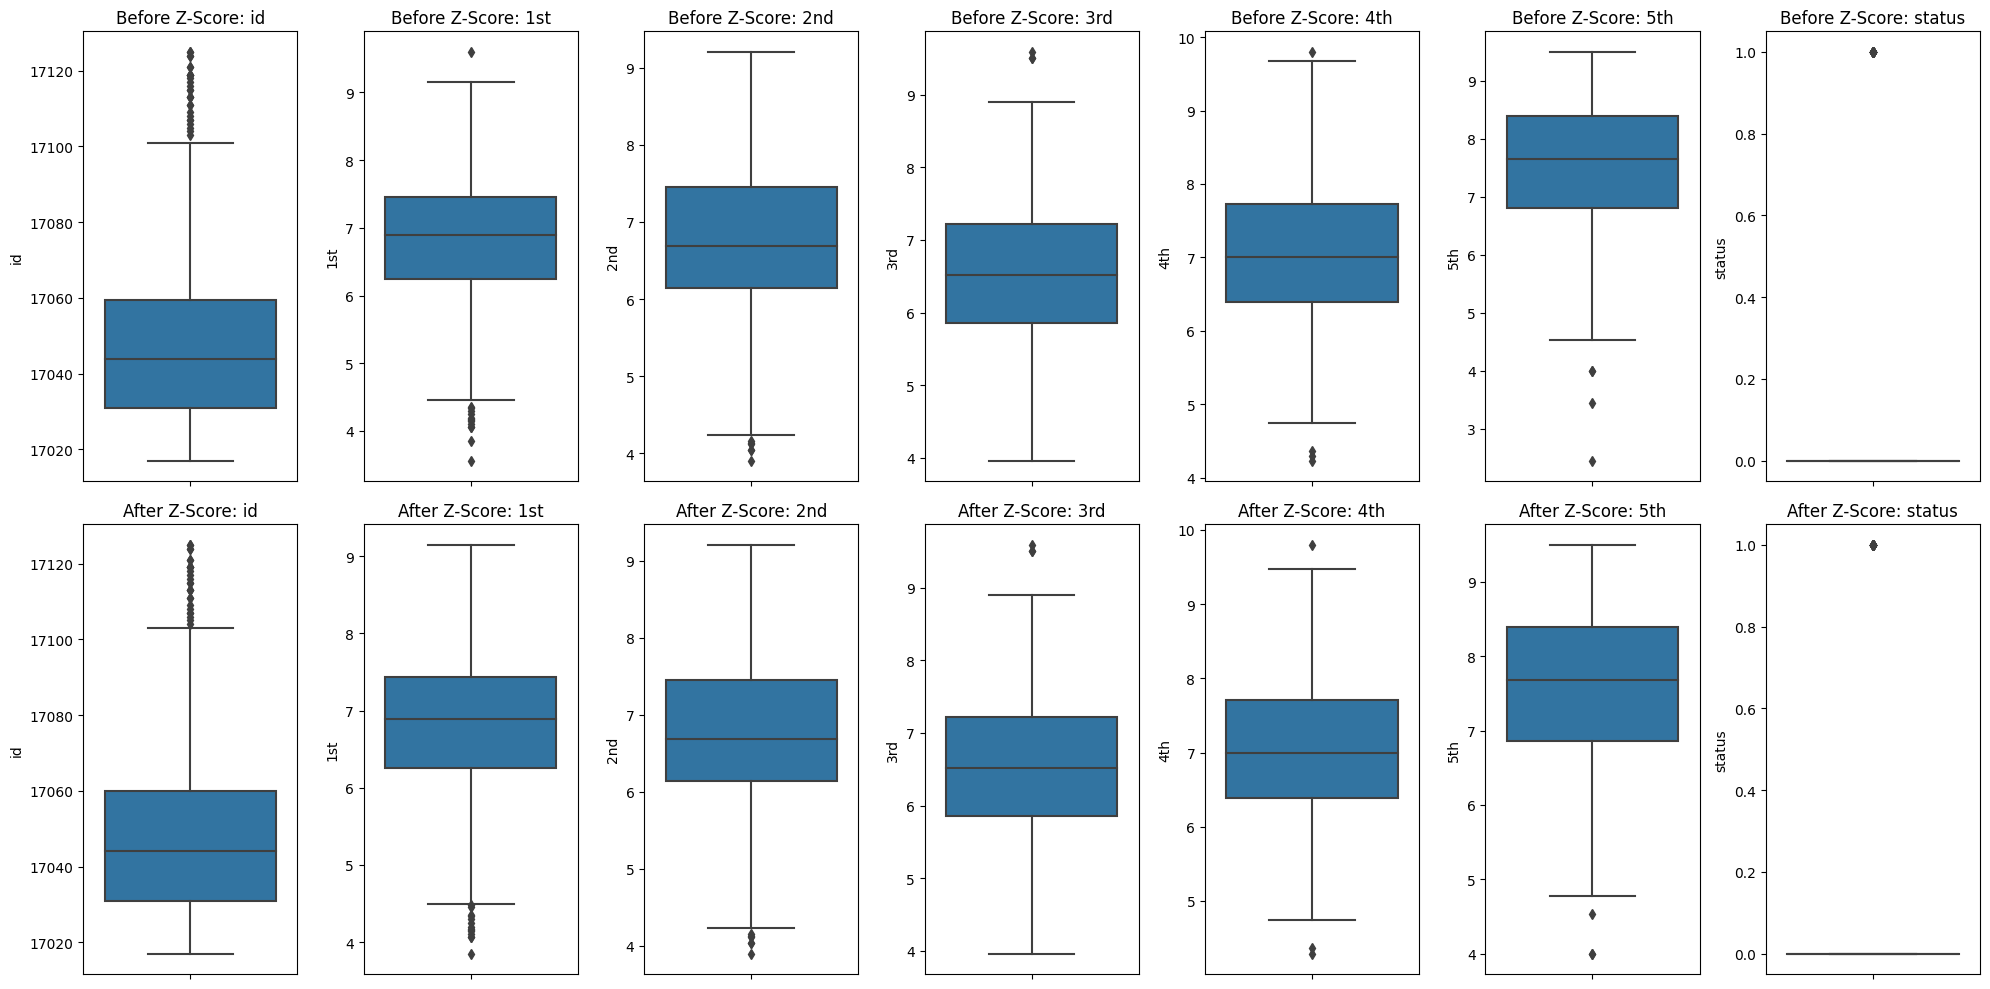

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

z_threshold = 3
Q1 = data[numerical_cols].quantile(0.25)
Q3 = data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
iqr_threshold = 1.5
mean_values = data[numerical_cols].mean()
median_values = data[numerical_cols].median()

z_scores = np.abs(stats.zscore(data[numerical_cols]))
outliers_z = (z_scores > z_threshold)

outliers_iqr = ((data[numerical_cols] < (Q1 - iqr_threshold * IQR)) | (data[numerical_cols] > (Q3 + iqr_threshold * IQR)))

data_clean_z = data[(z_scores < z_threshold).all(axis=1)]

data_clean_iqr = data[~outliers_iqr.any(axis=1)]

fig, axes = plt.subplots(2, len(numerical_cols), figsize=(20, 10))
for i, col in enumerate(numerical_cols):
    sns.boxplot(y=data[col], ax=axes[0, i])
    axes[0, i].set_title(f'Before Z-Score: {col}')
    sns.boxplot(y=data_clean_z[col], ax=axes[1, i])
    axes[1, i].set_title(f'After Z-Score: {col}')

plt.tight_layout()

outliers_z_count = (z_scores > z_threshold).sum(axis=0)


outliers_iqr_count = outliers_iqr.sum(axis=0)

outliers_detected = pd.DataFrame({
    'Z-Score Outliers': outliers_z_count,
    'IQR Outliers': outliers_iqr_count
})

outliers_detected

In [81]:
data.head()


,id,Gender,1st,2nd,3rd,4th,5th,status
0,17017,M,6.19,6.21,5.70,5.46,6.93,0
1,17018,F,6.22,6.28,6.11,6.11,6.54,0
2,17018,F,8.22,8.76,7.74,8.46,8.38,0
3,17019,M,5.85,5.66,4.59,5.86,6.00,0
4,17019,M,7.15,6.79,6.75,6.78,6.62,0


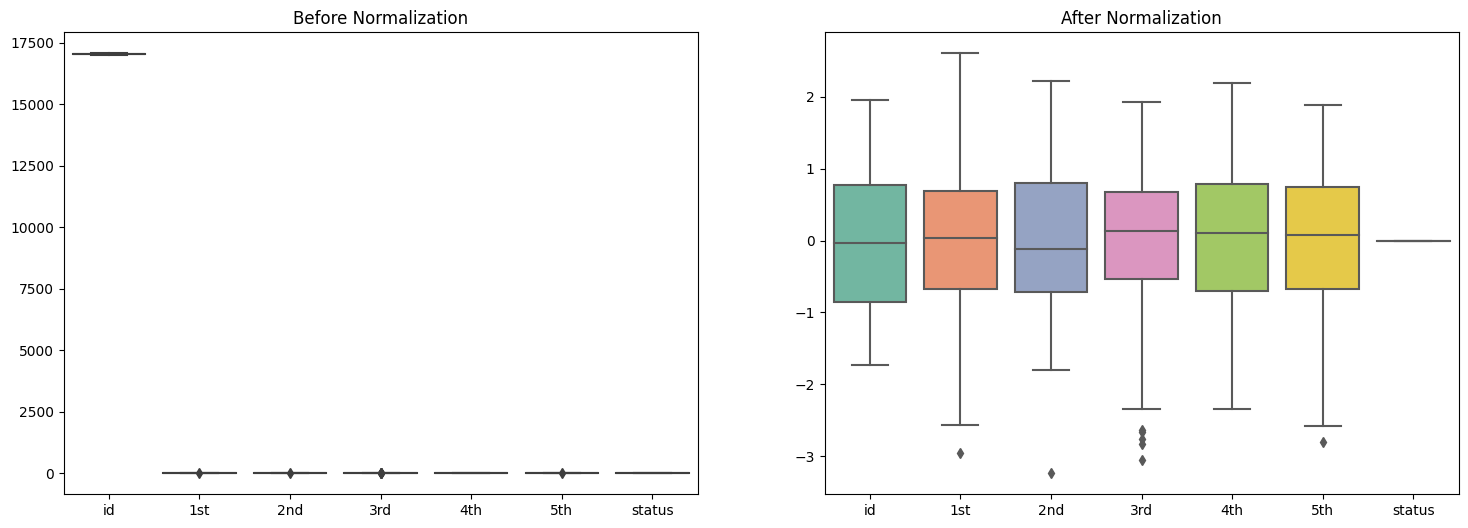

,id,Gender,1st,2nd,3rd,4th,5th,status
0,-1.736921,M,-1.185472,-0.938503,-1.086628,-1.633481,-0.494377,0.0
1,-1.663141,F,-1.147039,-0.855013,-0.623696,-0.977004,-0.872319,0.0
2,-1.663141,F,1.415177,2.102903,1.216742,1.396413,0.910789,0.0
3,-1.589362,M,-1.621049,-1.594492,-2.339932,-1.229495,-1.395622,0.0
4,-1.589362,M,0.044392,-0.246732,0.098930,-0.300328,-0.794792,0.0


In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_clean_iqr[numerical_cols])
data_normalized_df = pd.DataFrame(data_normalized, columns=numerical_cols)
for col in data_clean_iqr.columns.difference(numerical_cols):
    data_normalized_df[col] = data_clean_iqr[col].values

data_normalized_df = data_normalized_df[data_clean_iqr.columns]

fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.boxplot(data=data_clean_iqr[numerical_cols], ax=axes[0], palette="Set1")
axes[0].set_title('Before Normalization')

sns.boxplot(data=data_normalized_df[numerical_cols], ax=axes[1], palette="Set2")
axes[1].set_title('After Normalization')
plt.show()

normalized_data_head = data_normalized_df.head()
normalized_data_head


In [83]:
data.head()

,id,Gender,1st,2nd,3rd,4th,5th,status
0,17017,M,6.19,6.21,5.70,5.46,6.93,0
1,17018,F,6.22,6.28,6.11,6.11,6.54,0
2,17018,F,8.22,8.76,7.74,8.46,8.38,0
3,17019,M,5.85,5.66,4.59,5.86,6.00,0
4,17019,M,7.15,6.79,6.75,6.78,6.62,0


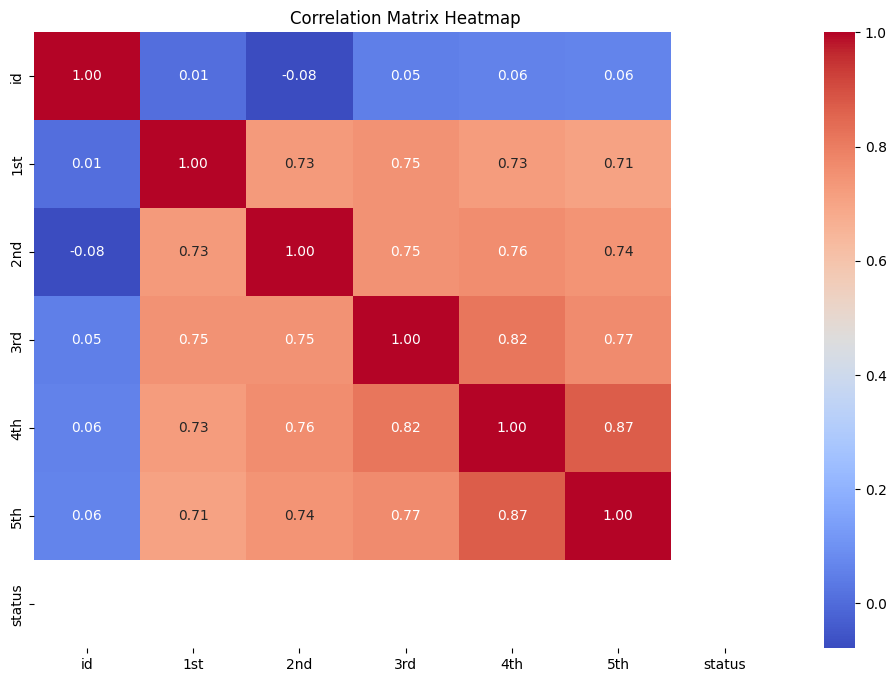

2nd  id    -0.078583
1st  id     0.006147
3rd  id     0.048952
4th  id     0.058910
5th  id     0.064599
     1st    0.706482
4th  1st    0.725416
2nd  1st    0.728874
5th  2nd    0.744556
3rd  1st    0.750274
     2nd    0.751033
4th  2nd    0.760999
5th  3rd    0.766266
4th  3rd    0.817823
5th  4th    0.872255
dtype: float64

In [84]:
numeric_data_for_corr = data_normalized_df.select_dtypes(include=[np.number])


correlation_matrix = numeric_data_for_corr.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()
upper_corr_matrix = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
correlation_sorted = upper_corr_matrix.unstack().sort_values(kind="quicksort").dropna()

correlation_sorted

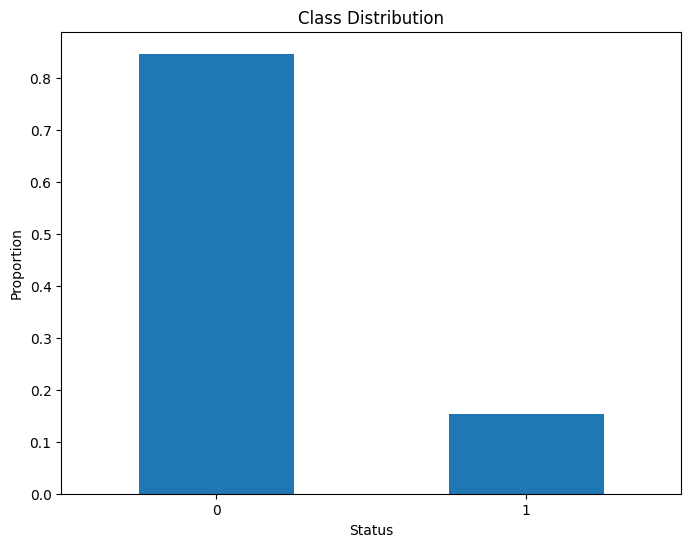

status
0    0.847291
1    0.152709
Name: proportion, dtype: float64

In [85]:
class_distribution = data['status'].value_counts(normalize=True)

plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Status')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()

class_distribution



In [86]:
data.head(15)

,id,Gender,1st,2nd,3rd,4th,5th,status
0,17017,M,6.19,6.21,5.70,5.46,6.93,0
1,17018,F,6.22,6.28,6.11,6.11,6.54,0
2,17018,F,8.22,8.76,7.74,8.46,8.38,0
3,17019,M,5.85,5.66,4.59,5.86,6.00,0
4,17019,M,7.15,6.79,6.75,6.78,6.62,0
5,17020,F,8.11,7.68,7.11,7.43,8.18,0
6,17020,M,7.37,7.24,6.48,7.18,7.82,0
7,17020,F,7.07,7.66,7.22,7.86,7.31,0
8,17021,M,6.48,5.90,4.15,4.29,4.96,0
9,17021,M,7.59,7.83,6.89,7.32,8.50,0


/Users/vishaldutt/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


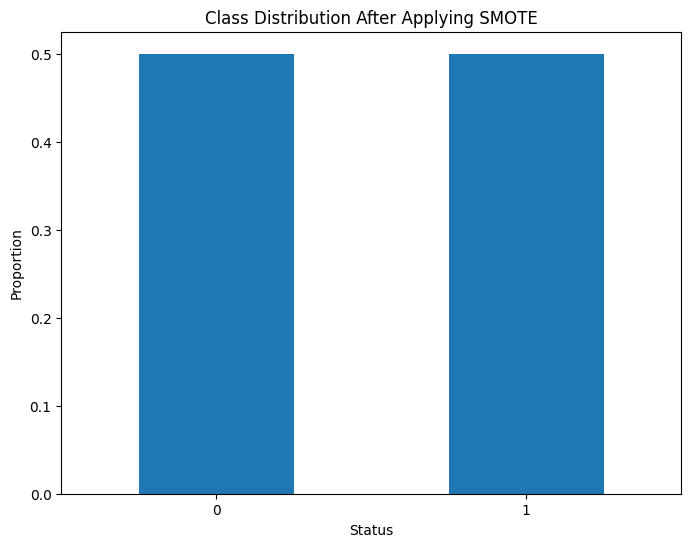

status
0    0.5
1    0.5
Name: proportion, dtype: float64

In [87]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
gender_encoded = encoder.fit_transform(data[['Gender']])

encoded_df = pd.DataFrame(gender_encoded, columns=encoder.get_feature_names_out(['Gender']))
data_encoded = pd.concat([data.drop('Gender', axis=1), encoded_df], axis=1)
X_encoded = data_encoded.drop('status', axis=1)  # Features
y_encoded = data_encoded['status']  # Target variable

from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_encoded, y_encoded)
new_class_distribution = pd.Series(y_resampled).value_counts(normalize=True)
plt.figure(figsize=(8, 6))
new_class_distribution.plot(kind='bar')
plt.title('Class Distribution After Applying SMOTE')
plt.xlabel('Status')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()

new_class_distribution




In [88]:

def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length + 1):
        sequence = data[i:i + sequence_length]
        sequences.append(sequence)
    return np.array(sequences)


marks_columns = ['1st', '2nd', '3rd', '4th', '5th']
marks_data = data[marks_columns].values


sequence_length = 3

sequences = create_sequences(marks_data, sequence_length)

X = sequences[:, :-1, :]  
y = sequences[:, -1, :]  

X.shape, y.shape



((201, 2, 5), (201, 5))

In [90]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

model = Sequential()

input_shape = (X.shape[1], X.shape[2])

model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
model.add(LSTM(units=50, return_sequences=False))


model.add(Dropout(0.2))

model.add(Dense(units=50, activation='relu'))

model.add(Dense(units=5))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()
data.head(20)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2, 50)             11200     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 50)                2550      
                                                                 
 dense_1 (Dense)             (None, 5)                 255       
                                                                 
Total params: 34,205
Trainable params: 34,205
Non-trainable params: 0
_________________________________________________________________


,id,Gender,1st,2nd,3rd,4th,5th,status
0,17017,M,6.19,6.21,5.70,5.46,6.93,0
1,17018,F,6.22,6.28,6.11,6.11,6.54,0
2,17018,F,8.22,8.76,7.74,8.46,8.38,0
3,17019,M,5.85,5.66,4.59,5.86,6.00,0
4,17019,M,7.15,6.79,6.75,6.78,6.62,0
5,17020,F,8.11,7.68,7.11,7.43,8.18,0
6,17020,M,7.37,7.24,6.48,7.18,7.82,0
7,17020,F,7.07,7.66,7.22,7.86,7.31,0
8,17021,M,6.48,5.90,4.15,4.29,4.96,0
9,17021,M,7.59,7.83,6.89,7.32,8.50,0


In [91]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()
input_shape = (X.shape[1], X.shape[2])

model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
model.add(LSTM(units=50, return_sequences=False))

model.add(Dropout(0.2))

model.add(Dense(units=50, activation='relu'))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(
    optimizer=Adam(learning_rate=0.001),  
    loss='binary_crossentropy',  
    metrics=['accuracy'] 
)

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 2, 50)             11200     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 34,001
Trainable params: 34,001
Non-trainable params: 0
_________________________________________________________________


In [92]:
y_aligned = data['status'][sequence_length - 1:].values

X_train, X_val, y_train, y_val = train_test_split(X, y_aligned, test_size=0.2, random_state=42)

print(f'X_train samples: {X_train.shape[0]}, y_train samples: {y_train.shape[0]}')
print(f'X_val samples: {X_val.shape[0]}, y_val samples: {y_val.shape[0]}')

X_train samples: 160, y_train samples: 160
X_val samples: 41, y_val samples: 41


In [95]:
from tensorflow.keras.callbacks import EarlyStopping

batch_size = 32  
epochs = 100    
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_val: {y_val.shape}")

y_train = y_train.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)

print(f"After reshape, shape of y_train: {y_train.shape}")
print(f"After reshape, shape of y_val: {y_val.shape}")

early_stopping_monitor = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)


from tensorflow.keras.backend import clear_session
clear_session()
model.compile(
    optimizer=Adam(learning_rate=0.001),  
    loss='binary_crossentropy',           
    metrics=['accuracy']                  
)

model.summary()

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[early_stopping_monitor],
    verbose=1
)

model.save('LSTM_Model.h5')

!pwd

#!ls


Shape of X_train: (160, 2, 5)
Shape of y_train: (160, 1)
Shape of X_val: (41, 2, 5)
Shape of y_val: (41, 1)
After reshape, shape of y_train: (160, 1)
After reshape, shape of y_val: (41, 1)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 2, 50)             11200     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                               

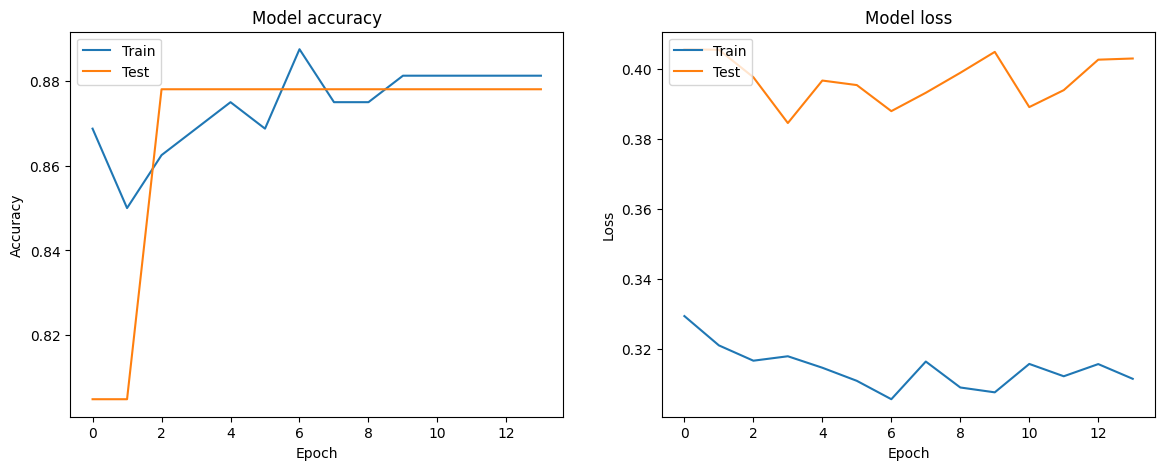

In [96]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [97]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error
from tensorflow.keras.utils import to_categorical

y_pred_probs = model.predict(X_val)
y_pred = (y_pred_probs > 0.5).astype('int32') 

accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')


2/2 [==============================] - 1s 88ms/step
Accuracy: 0.8780
Precision: 1.0000
Recall: 0.3750
F1 Score: 0.5455
Mean Absolute Error: 0.1220


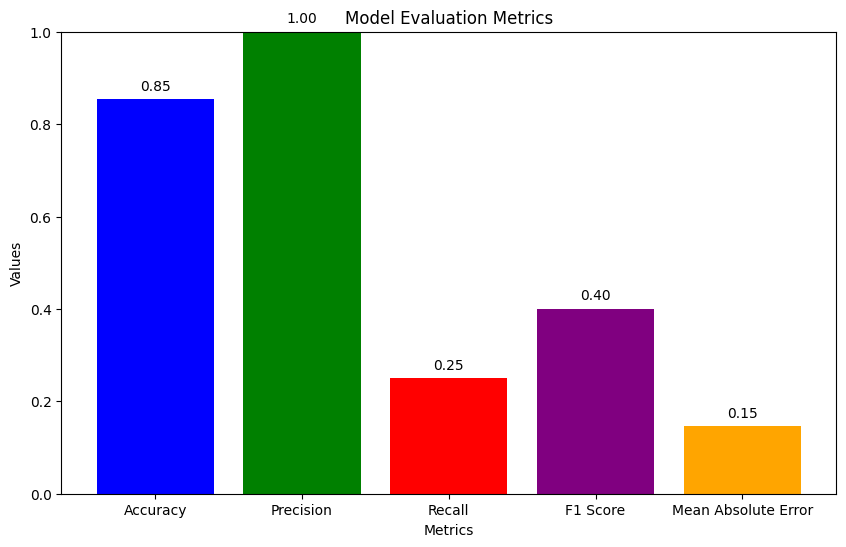

In [98]:
import matplotlib.pyplot as plt

accuracy = 0.8537
precision = 1.0000
recall = 0.2500
f1 = 0.4000
mae = 0.1463

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean Absolute Error']
values = [accuracy, precision, recall, f1, mae]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Model Evaluation Metrics')
plt.ylim(0, 1)  

for i in range(len(values)):
    plt.text(i, values[i] + 0.02, f'{values[i]:.2f}', ha='center')

plt.show()



In [99]:

import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
import datetime

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[tensorboard_callback],
    verbose=1
)

Epoch 1/100
5/5 [==============================] - 0s 34ms/step - loss: 0.3169 - accuracy: 0.8688 - val_loss: 0.3917 - val_accuracy: 0.8780
Epoch 2/100
5/5 [==============================] - 0s 24ms/step - loss: 0.3104 - accuracy: 0.8750 - val_loss: 0.3981 - val_accuracy: 0.8780
Epoch 3/100
5/5 [==============================] - 0s 21ms/step - loss: 0.3171 - accuracy: 0.8750 - val_loss: 0.3883 - val_accuracy: 0.8780
Epoch 4/100
5/5 [==============================] - 0s 23ms/step - loss: 0.3081 - accuracy: 0.8875 - val_loss: 0.3891 - val_accuracy: 0.8780
Epoch 5/100
5/5 [==============================] - 0s 21ms/step - loss: 0.3105 - accuracy: 0.8813 - val_loss: 0.3999 - val_accuracy: 0.8780
Epoch 6/100
5/5 [==============================] - 0s 21ms/step - loss: 0.3128 - accuracy: 0.8750 - val_loss: 0.3943 - val_accuracy: 0.8780
Epoch 7/100
5/5 [==============================] - 0s 20ms/step - loss: 0.3117 - accuracy: 0.8813 - val_loss: 0.3868 - val_accuracy: 0.8780
Epoch 8/100
5/5 [===

In [101]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model

file_path_test = '/Users/vishaldutt/Downloads/fdata.csv'
test_data = pd.read_csv(file_path_test)

initial_data_overview = data.head()

missing_values_before = data.isnull().sum()

numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())


categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])
missing_values_after = data.isnull().sum()


initial_data_overview, missing_values_before, missing_values_after

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

z_threshold = 3

Q1 = data[numerical_cols].quantile(0.25)
Q3 = data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
iqr_threshold = 1.5

mean_values = data[numerical_cols].mean()
median_values = data[numerical_cols].median()

z_scores = np.abs(stats.zscore(data[numerical_cols]))
outliers_z = (z_scores > z_threshold)

outliers_iqr = ((data[numerical_cols] < (Q1 - iqr_threshold * IQR)) | (data[numerical_cols] > (Q3 + iqr_threshold * IQR)))
data_clean_z = data[(z_scores < z_threshold).all(axis=1)]

data_clean_iqr = data[~outliers_iqr.any(axis=1)]

#***********


sequence_length = 3  
marks_columns = ['1st', '2nd', '3rd', '4th', '5th']

def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length + 1):
        sequence = data[i:i + sequence_length]
        sequences.append(sequence)
    return np.array(sequences)

test_sequences = create_sequences(test_data[marks_columns].values, sequence_length)
X_test = test_sequences[:, :-1, :]
model = load_model('/Users/vishaldutt/LSTM_Model.h5')  
y_test_pred_probs = model.predict(X_test)
y_test_pred = (y_test_pred_probs > 0.5).astype(int) 

suspicious_records = np.where(y_test_pred == 1)[0]

print("Indices of suspicious records in the test set:", suspicious_records)

#print("Suspicious records data:", test_data.iloc[suspicious_records])


7/7 [==============================] - 0s 19ms/step
Indices of suspicious records in the test set: [172 173 174 175 176 178 179 180 183 184 185 186 188 189 190 192 193 194
 195 196 198 199]
Suspicious records data:         id Gender   1st   2nd   3rd   4th   5th  status
172  17067      M  6.96  6.24  6.85  7.21  7.71       0
173  17100      F  4.89  4.76  4.70  6.67  8.57       1
174  17101      F  4.25  4.04  4.06  6.53  8.95       1
175  17103      M  6.30  6.24  5.85  6.36  7.00       0
176  17104      F  4.16  4.66  4.44  6.54  8.85       1
178  17106      M  7.11  7.41  7.00  7.32  8.32       0
179  17107      M  4.34  4.59  4.66  6.70  9.00       1
180  17107      F  4.06  4.24  4.43  6.76  8.89       1
183  17111      M  5.93  5.86  4.70  5.50  6.21       0
184  17111      F  5.00  4.36  4.47  6.69  8.99       1
185  17113      F  4.62  4.13  4.98  6.94  8.75       1
186  17113      M  4.17  4.33  4.68  6.53  8.80       1
188  17115      F  7.48  7.55  7.67  7.39  8.65       0
1